## Modelo autocura

El objetivo es desarrollar un modelo analítico que permita, a partir de los datos del archivo Base_entrenamiento.csv poder predecir si una obligación asociada a un cliente se auto-curará o no en cualquier ciclo de facturación. 

## Datos de Entrada:

Se importan las librerías que usaran  para realizar el modelo y  visualizar la información de entrada:

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sb
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest

Cargar la información del archivo csv:


In [122]:
dataframe = pd.read_csv(r"Desktop/Base_entrenamiento.csv")
dataframe.head(10)

,max_trim,max_sem,desv_sem,prom_bim,max_mes_anterior,prom_mes_anterior,prom_sem,max_bim,mejor_gestion,prom_trim,...,pc_vi_no_rotativos_entidad,dh_min_dia_entradas,pcons_hipotecario_vivienda,gsm_mejor_gestion_3m,dh_avg_dia_salidas,y_auto_cura,llave,segmentoestructural,subsegmentoestructural,anhomes_ciclo
0,7,7,2.857738,3.5,7,7.0,1.166667,7,0,2.333333,...,0.0,0,0,0,0.000000,0,2,1,1,201608
1,17,17,7.641989,12.0,17,17.0,8.000000,17,0,13.666667,...,0.0,2,0,0,8.810053,0,5,1,1,201611
2,27,36,12.868566,13.5,27,27.0,21.000000,27,0,14.000000,...,0.0,7,0,0,10.500000,0,9,1,1,201705
3,27,27,10.888832,13.5,27,27.0,4.833333,27,0,9.000000,...,0.0,0,0,0,0.000000,0,12,1,1,201609
4,32,32,11.651895,10.0,20,20.0,20.833333,20,0,17.333333,...,0.0,19,0,0,9.190000,0,15,1,1,201702
5,30,32,11.906581,28.5,27,27.0,22.833333,30,0,28.333333,...,0.0,7,0,0,10.500000,0,17,1,1,201705
6,0,0,0.000000,0.0,0,0.0,0.000000,0,0,0.000000,...,0.0,0,0,0,0.000000,1,20,1,1,201607
7,0,0,0.000000,0.0,0,0.0,0.000000,0,0,0.000000,...,0.0,1,0,0,9.591059,1,22,1,1,201612
8,0,0,0.000000,0.0,0,0.0,0.000000,0,0,0.000000,...,0.0,2,1,0,10.336827,1,26,1,1,201706
9,12,12,6.000000,6.0,12,12.0,3.000000,12,0,4.000000,...,0.0,0,0,0,0.000000,1,27,1,1,201607


In [124]:
# Conviertir  en variables numericas
#dataframe["segmentoestructural"][dataframe["segmentoestructural"] == "PYME "] = 1
#dataframe["subsegmentoestructural"][dataframe["subsegmentoestructural"] == "Pyme Pequena"] = 1

In [125]:
dataframe.head()

,max_trim,max_sem,desv_sem,prom_bim,max_mes_anterior,prom_mes_anterior,prom_sem,max_bim,mejor_gestion,prom_trim,...,pc_vi_no_rotativos_entidad,dh_min_dia_entradas,pcons_hipotecario_vivienda,gsm_mejor_gestion_3m,dh_avg_dia_salidas,y_auto_cura,llave,segmentoestructural,subsegmentoestructural,anhomes_ciclo
0,7,7,2.857738,3.5,7,7.0,1.166667,7,0,2.333333,...,0.0,0,0,0,0.000000,0,2,1,1,201608
1,17,17,7.641989,12.0,17,17.0,8.000000,17,0,13.666667,...,0.0,2,0,0,8.810053,0,5,1,1,201611
2,27,36,12.868566,13.5,27,27.0,21.000000,27,0,14.000000,...,0.0,7,0,0,10.500000,0,9,1,1,201705
3,27,27,10.888832,13.5,27,27.0,4.833333,27,0,9.000000,...,0.0,0,0,0,0.000000,0,12,1,1,201609
4,32,32,11.651895,10.0,20,20.0,20.833333,20,0,17.333333,...,0.0,19,0,0,9.190000,0,15,1,1,201702


## Descripción de los datos



In [45]:
dataframe.describe()

,max_trim,max_sem,desv_sem,prom_bim,max_mes_anterior,prom_mes_anterior,prom_sem,max_bim,mejor_gestion,prom_trim,...,pc_vi_no_rotativos_entidad,dh_min_dia_entradas,pcons_hipotecario_vivienda,gsm_mejor_gestion_3m,dh_avg_dia_salidas,y_auto_cura,llave,segmentoestructural,subsegmentoestructural,anhomes_ciclo
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.0000,20000.0000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.0,20000.0,20000.00000
mean,12.908100,16.447200,6.484026,7.653050,7.3156,7.3156,7.034238,10.878500,0.010300,7.507875,...,1634.203000,3.309350,0.03795,0.001600,6.729243,0.692400,20054.133900,1.0,1.0,201663.59140
std,19.558647,22.596153,8.130128,15.100529,15.7581,15.7581,13.312215,18.284183,0.387042,14.320475,...,18443.129269,5.683887,0.19108,0.159996,5.057818,0.461512,11678.100328,0.0,0.0,46.86751
min,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,2.000000,1.0,1.0,201607.00000
25%,0.000000,3.000000,1.224745,0.000000,0.0000,0.0000,0.666667,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,9939.500000,1.0,1.0,201610.00000
50%,7.000000,11.000000,4.242641,3.000000,0.0000,0.0000,3.500000,5.000000,0.000000,3.333333,...,0.000000,1.000000,0.00000,0.000000,8.265756,1.000000,19889.500000,1.0,1.0,201702.00000
75%,17.000000,22.000000,8.981462,9.000000,9.0000,9.0000,8.666667,14.000000,0.000000,9.000000,...,0.000000,3.000000,0.00000,0.000000,10.518994,1.000000,30168.250000,1.0,1.0,201705.00000
max,696.000000,1062.000000,210.552052,681.500000,696.0000,696.0000,850.000000,696.000000,16.000000,667.333333,...,348900.000000,31.000000,1.00000,16.000000,30.000000,1.000000,40453.000000,1.0,1.0,201708.00000


In [126]:
dataframe.shape

(20000, 124)

Veamos qué cantidad de muestras de auto_cura:

In [29]:
print(dataframe.groupby('y_auto_cura').size())

y_auto_cura
0     6152
1    13848
dtype: int64


Esto son 6152 que entradas en las que no realizaron autocura y 13848 las que si

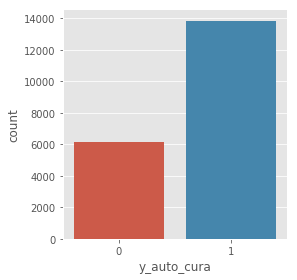

In [85]:
sb.factorplot('y_auto_cura',data=dataframe,kind="count", aspect=1)

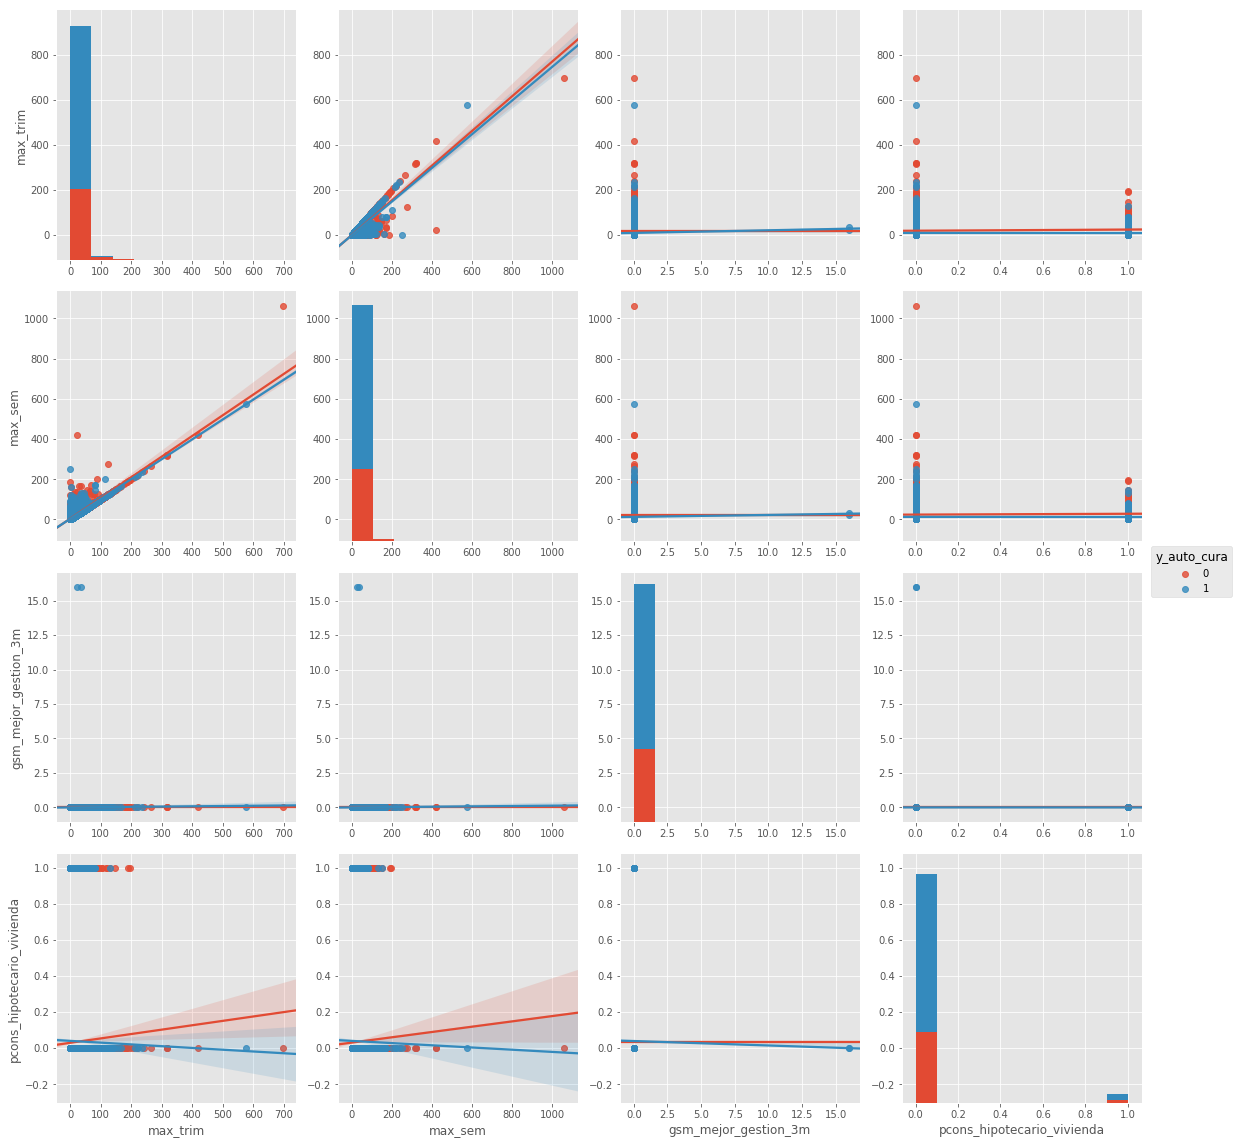

In [115]:
sb.pairplot(dataframe.dropna(), hue='y_auto_cura',size=4,vars=["max_trim", "max_sem","gsm_mejor_gestion_3m","pcons_hipotecario_vivienda"],kind='reg')

## Feature Selection ó Selección de Características

los "Feature Selection" sirven para mejorar los resultados del algoritmo. En vez de utilizar las todas las  columnas de datos de entrada que se tienen, se utiliza una Clase de SkLearn llamada SelectKBest con la cual se selecciona las 5 mejores características

In [62]:
X=dataframe.drop(['y_auto_cura'], axis=1)
y=dataframe['y_auto_cura']
 
best=SelectKBest(k=5)
X_new = best.fit_transform(X, y)
X_new.shape
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['max_trim', 'max_sem', 'desv_sem', 'max_bim', 'desv_trim'], dtype='object')


C:\Users\W\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [ 28  31  60  62  64  68  70  77  90  91  93  97 102 120 121] are constant.
  UserWarning)
C:\Users\W\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Despues de calcular las 5 mejores características osea Las que “más aportan” al momento de clasificar. Procedemos a analizar el grado de correlacción que hay entre ellas:

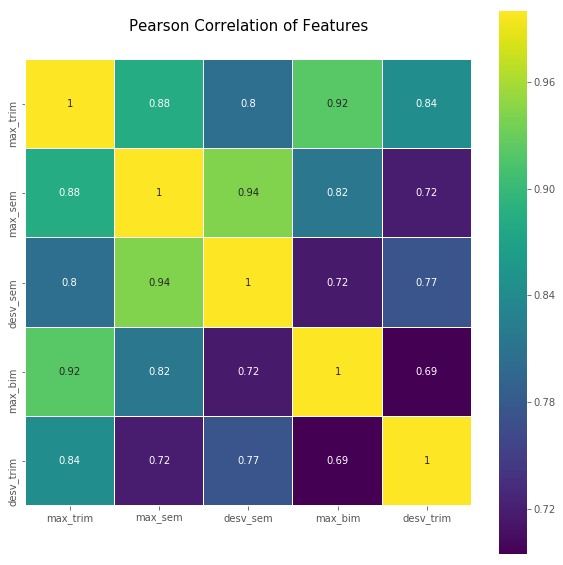

In [86]:
used_features =X.columns[selected]
 
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sb.heatmap(dataframe[used_features].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

Con esto comprobamos que en general los datos esta correlacionados

## Modelo Gaussian Naive Bayes con SKLearn

Los métodos de Naive Bayes son un conjunto de algoritmos de aprendizaje supervisado basados en la aplicación del teorema de Bayes con la suposición de independencia "ingenua" entre cada par de características. 
El teorema de Bayes

Es una ecuación que describe la relación de probabilidades condicionales de cantidades estadísticas. En clasificación bayesiana estamos interesados en encontrar la probabilidad de que ocurra una “clase” dadas unas características observadas (datos). Lo podemos escribir como P( Clase | Datos). El teorema de Bayes nos dice cómo lo podemos expresar en términos de cantidades que podemos calcular directamente:

- Clase es una salida en particular, “auto_cura”
- Datos son nuestras características, max_trim,max_sem,prom_bim
- P(Clase|Datos) se llama posterior (y es el resultado que queremos hallar)
- P(Datos|Clase) se llama “verosimilitud”
- P(Clase) se llama anterior (pues es una probabilidad que ya tenemos)
- P(Datos) se llama probabilidad marginal



Lo primero es dividir los datos de entrada en entrenamiento y test.

In [105]:
# Split dataset in training and test datasets
X_train, X_test = train_test_split(dataframe, test_size=1, random_state=5) 
y_train =X_train["y_auto_cura"]
y_test = X_test["y_auto_cura"]


Se crea el modelo, el cual aprende con el metodo fit() y se obtienen las  predicciones sobre el conjunto de test.

In [109]:
gnb = GaussianNB()
# Train classifier
gnb.fit(
    X_train[used_features].values,
    y_train
)
y_pred = gnb.predict(X_test[used_features])
 
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(gnb.score(X_train[used_features], y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(gnb.score(X_test[used_features], y_test)))

Precisión en el set de Entrenamiento: 0.71
Precisión en el set de Test: 1.00


se ha obtenido un bonito 100% de aciertos en el conjunto de Test para el  clasificador bayesiano.

Probemos el modelo con los datos de base prueba:

In [110]:
print(gnb.predict([
    [0,11,4,0,0],
[17,17,7,17,7],
[17,17,7,17,7],
[36,36,12,36,4],
[36,36,10,36,13],
[18,36,13,15,11],
[27,36,12,27,3],
[0,2,1,0,0],
[27,27,12,27,7],
[32,32,14,32,23],
[30,32,12,30,1],
[31,31,12,31,3],
[0,0,0,0,0],
[0,0,0,0,0],
[15,15,8,15,11],
[7,7,3,7,5],
[7,7,3,2,1],
[12,12,5,12,6],
[28,28,11,0,0],
[4,28,11,4,3],
[3,4,2,3,2],
[4,4,2,0,0],
[0,0,0,0,0],
[7,7,4,7,1],
[33,33,16,33,23],
[19,33,15,19,13],
[19,33,15,8,6],
[11,19,8,11,0],
[6,11,5,6,4],
[12,12,6,12,8],
[7,12,5,4,0],
[15,15,6,15,11],
[15,15,6,15,6],
[0,5,2,0,0],
[13,13,5,13,9],
[30,30,12,30,12],
[30,30,13,30,6],
[9,9,4,9,6],
[16,16,6,16,11],
[16,16,6,5,4],
[16,16,7,16,11],
[0,5,2,0,0],
[60,60,25,60,21],
[60,60,24,60,28],
[0,5,2,0,0],
[0,0,0,0,0],
[30,30,13,30,6],
[4,35,16,4,3],
[0,4,2,0,0],
[0,2,1,0,0],
[0,0,0,0,0],
[3,3,1,3,2],
[0,0,0,0,0],
[3,3,1,3,2],
[3,3,2,3,0],
[8,8,3,8,4],
[0,0,0,0,0],
[3,3,1,3,2],
[23,23,9,23,14],
[0,0,0,0,0],
[9,11,5,9,6],
[9,11,5,4,3],
[0,11,4,0,0],
[9,9,4,9,6],
[9,12,5,0,0],
[0,11,4,0,0],
[7,7,4,0,0],
[8,8,6,8,6],
[16,16,7,16,11],
[18,18,7,18,1],
[34,34,13,34,24],
[34,34,13,8,6],
[93,93,34,93,4],
[33,33,9,33,4],
[46,46,7,46,6],
[0,9,4,0,0],
[6,6,2,6,4],
[10,10,4,10,1],
[10,10,4,10,6],
[9,9,5,9,6],
[0,14,6,0,0],
[6,6,2,6,4],
[8,8,4,8,1],
[13,13,4,13,2],
[0,0,0,0,0],
[0,0,0,0,0],
[21,21,2,21,2],
[21,21,8,21,11],
[20,21,9,20,14],
[0,0,0,0,0],
[34,34,14,34,5],
[0,34,15,0,0],
[8,34,14,8,6],
[27,27,11,27,19],
[0,3,1,0,0],
[0,3,1,0,0],
[0,0,0,0,0],
[0,3,1,0,0],
[0,0,0,0,0],
[0,15,9,0,0],
[4,4,2,0,0],
[26,26,11,26,18],
[4,15,6,4,3],
[4,4,2,0,0],
[26,26,10,26,18],
[22,22,9,22,16],
[0,0,0,0,0],
[8,8,5,8,6],
[45,45,19,45,32],
[5,31,12,0,0],
[0,0,0,0,0],
[23,23,16,23,16],
[44,44,18,0,0],
[3,14,6,3,2],
[133,133,22,133,9],
[0,0,0,0,0],
[11,11,6,11,8],
[4,5,2,4,3],
[4,4,2,0,0],
[4,4,2,4,3],
[4,4,2,4,3],
[16,16,6,16,8],
[16,16,7,16,1],
[0,4,2,0,0],
[17,17,12,17,12],
[17,17,8,13,7],
[32,32,1,32,1],
[32,32,17,2,1],
[0,0,0,0,0],
[0,0,0,0,0],
[0,0,0,0,0],
[91,91,24,91,36],
[40,91,24,32,1],
[80,80,57,80,57],
[24,80,38,24,17],
[24,50,21,24,17],
[0,0,0,0,0],
[50,50,25,50,35],
[35,50,18,35,4],
[20,20,9,20,14],
[2,2,1,2,1],
[5,5,2,5,4],
[8,8,3,0,0],
[3,8,3,3,2],
[8,8,3,8,6],
[10,10,5,10,7],
[10,10,5,9,6],
[20,20,8,0,0],
[9,9,4,9,3],
[0,0,0,0,0],
[0,0,0,0,0],
[0,0,0,0,0],
[9,14,6,9,1],
[29,29,11,29,8],
[14,14,6,0,0],
[18,18,8,18,1],
[0,0,0,0,0],
[11,11,4,2,1],
[0,27,11,0,0],
[26,27,13,26,18],
[33,33,15,0,0],
[9,33,15,9,6],
[12,12,6,0,0],
[28,28,13,3,2],
[3,3,2,3,2],
[31,31,15,31,1],
[5,10,4,0,0],
[20,20,8,20,11],
[9,9,4,9,6],
[11,11,5,11,2],
[0,0,0,0,0],
[12,18,8,12,8],
[5,5,2,3,2],
[5,5,2,5,2],
[5,5,2,5,1],
[7,7,2,7,3],
[7,7,2,3,1],
[2,2,1,2,1],
[0,5,2,0,0],
[0,0,0,0,0],
[2,2,1,0,0],
[0,3,1,0,0],
[2,3,1,2,1],
[0,0,0,0,0],
[5,5,2,5,4],
[6,6,3,6,4],
[0,0,0,0,0],
[0,0,0,0,0],
[0,0,0,0,0],
[9,9,4,0,0],
[0,0,0,0,0],
[6,6,3,0,0],
[9,9,4,9,6],
[0,0,0,0,0],
[18,18,0,18,0],
[23,23,9,23,8],
[23,23,8,20,6],
[0,0,0,0,0],
[0,0,0,0,0],
[0,0,0,0,0],
[12,12,5,12,6],
[2,2,1,0,0],
[14,14,6,14,10],
[0,0,0,0,0],
[4,4,2,4,3],
[0,0,0,0,0],
[0,0,0,0,0],
[0,0,0,0,0],
[2,2,1,2,1],
[33,33,18,33,2],
[33,33,15,17,12],
[17,33,14,10,7],
[33,33,18,0,0],
[190,190,51,190,7],
[85,85,37,85,60],
[34,85,29,34,3],
[34,85,28,30,1],
[42,42,12,42,0],
[0,0,0,0,0],
[0,0,0,0,0],
[0,0,0,0,0],
[19,19,11,19,13],
[13,13,9,13,9],
[12,12,5,6,3],
[16,16,7,16,9],
[14,14,6,14,5],
[0,8,3,0,0],
[19,30,13,0,0],
[15,30,12,15,11],
[0,0,0,0,0],
[19,19,10,6,4],
[13,19,8,13,9],
[20,20,8,20,8],
[0,24,10,0,0],
[10,14,7,10,7],
[10,10,5,5,4],
[25,25,9,25,18],
[0,0,0,0,0],
[0,6,2,0,0],
[0,3,1,0,0],
[2,2,1,2,1],
[0,0,0,0,0],
[0,0,0,0,0],
[0,0,0,0,0],
[2,2,1,2,1],
[2,2,1,2,1],
[20,28,9,19,13],
[19,20,8,19,13],
[23,23,8,23,3],
[23,23,8,19,4],
[27,27,9,27,10],
[31,31,8,31,1],
[31,31,10,31,18],
[15,15,7,15,8],
[28,28,12,28,18],
[0,0,0,0,0],
[18,33,13,18,13],
[0,0,0,0,0],
[0,0,0,0,0],
[0,0,0,0,0],
[0,0,0,0,0],
[30,34,16,30,0],
[32,40,17,32,3],
[7,14,6,7,5],
[10,14,6,10,7],
[59,59,25,44,31],
[0,0,0,0,0],
[10,10,4,10,3],
[10,10,4,10,5],
[12,12,4,12,6],
[6,6,3,6,4],
[6,6,3,6,1],
[19,19,8,19,10],
[19,19,7,19,9],
[0,0,0,0,0],
[3,3,0,3,0],
[30,30,15,0,0],
[0,0,0,0,0],
[18,27,12,18,13],
[18,27,11,7,5],
[0,0,0,0,0],
[15,17,8,15,8],
[25,32,12,25,18],
[8,25,9,8,2],
[22,22,8,4,3],
[4,22,8,4,0],
[10,10,5,9,4],
[4,4,2,2,1],
[18,18,7,3,2],
[0,0,0,0,0],
[8,8,4,0,0],
[5,5,1,5,1],
[5,5,1,3,0],
[5,5,1,5,1],
[6,6,1,6,1],
[6,6,1,5,1],
[5,6,1,5,1],
[5,6,2,5,2],
[45,45,17,20,6],
[24,45,13,24,9],
[24,45,15,21,15],
[25,25,12,25,18],
[0,0,0,0,0],
[0,0,0,0,0],
[0,0,0,0,0],
[5,5,3,5,4],
[3,3,2,3,2],
[0,7,3,0,0],
[21,21,11,21,15],
[13,21,9,0,0],
[11,11,0,11,0],
[11,11,6,10,7],
[0,0,0,0,0],
[21,21,4,21,4],
[0,0,0,0,0],
[0,20,9,0,0],
[2,2,1,2,1],
[18,18,9,18,13],
[41,41,18,41,7],
[0,0,0,0,0],
[0,0,0,0,0],
[3,3,1,0,0],
[0,12,6,0,0],
[10,10,4,0,0],
[0,24,10,0,0],
[19,19,8,0,0],
[21,21,10,21,15],
[19,23,11,0,0],
[6,23,10,6,4],
[0,25,13,0,0],
[2,2,1,2,1],
[0,0,0,0,0],
[6,6,3,6,4],
[0,0,0,0,0],
[0,0,0,0,0],
[2,2,1,2,1],
[0,0,0,0,0],
[72,72,31,72,8],
[37,37,17,37,5],
[37,37,17,37,23],
[85,85,29,85,0],
[0,67,31,0,0],
[0,0,0,0,0],
[24,24,12,24,7],
[24,24,10,24,4],
[24,24,9,18,0],
[0,6,2,0,0],
[0,0,0,0,0],
[22,22,10,22,4],
[8,8,3,8,6],
[16,16,7,8,6],
[0,7,3,0,0],
[8,8,3,0,0],
[8,8,4,8,6],
[8,8,3,8,6],
[0,0,0,0,0],
[16,16,6,6,4],
[0,0,0,0,0],
[0,12,5,0,0],
[13,13,5,13,9],
[13,13,5,13,5],
[0,6,2,0,0],
[0,14,8,0,0],
[3,3,1,0,0],
[18,69,26,7,1],
[50,50,19,50,13],
[21,21,7,21,7],
[26,26,6,26,8],
[48,48,16,38,5],
[0,5,2,0,0],
[0,0,0,0,0],
[5,5,3,5,4],
[0,0,0,0,0],
[2,2,1,2,0],
[0,0,0,0,0],
[3,3,1,3,2],
[0,7,3,0,0],
[0,0,0,0,0],
[0,0,0,0,0],
[3,3,1,3,2],
[0,0,0,0,0],
[0,8,3,0,0],
[2,8,3,2,1],
[2,2,1,2,1],
[26,26,10,26,17],
[26,26,11,26,18],
[0,0,0,0,0],
[0,0,0,0,0],
[0,0,0,0,0],
[0,0,0,0,0],
[26,26,18,26,18],
[0,3,2,0,0],
[2,3,2,2,1],
[2,3,2,2,1],
[0,4,2,0,0],
[0,0,0,0,0],
[0,0,0,0,0],
[0,0,0,0,0],
[0,0,0,0,0],
[2,2,1,2,1],
[29,30,1,29,1],
[0,0,0,0,0],
[8,8,0,8,0],
[19,19,10,19,13],
[0,39,16,0,0],
[5,6,3,0,0],
[0,5,2,0,0],
[29,29,12,29,21],
[0,30,12,0,0],
[28,28,11,28,20],
[30,30,15,30,1],
[0,36,17,0,0],
[28,28,11,28,20],
[0,0,0,0,0],
[0,0,0,0,0],
[0,0,0,0,0],
[0,0,0,0,0],
[0,0,0,0,0],
[0,0,0,0,0],
[0,0,0,0,0],
[2,8,3,2,1],
[12,12,0,12,0],
[0,24,11,0,0],
[0,6,3,0,0],
[0,0,0,0,0],
[8,19,8,8,6],
[0,0,0,0,0],
[0,0,0,0,0],
[0,0,0,0,0],
[3,3,1,3,2],
[4,4,2,4,1],
[4,4,2,4,0],
[11,11,4,11,6],
[0,0,0,0,0],
[4,4,2,3,2],
[6,6,3,6,4],
[6,6,3,6,4],
[0,0,0,0,0],
[10,14,3,10,2],
[35,35,10,14,0],
[37,37,10,37,8],
[0,0,0,0,0],
[10,10,4,10,7],
[10,10,4,10,6],
[0,0,0,0,0],
[2,2,1,2,1],
[4,4,2,4,3],
[4,4,2,4,1],
[0,0,0,0,0],
[19,24,4,19,3],
[10,19,7,10,7],
[23,23,9,20,0],
[20,23,9,20,2],
[30,30,7,13,3],
[22,30,7,22,9],
[18,23,9,0,0],
[22,22,8,22,0],
[22,22,8,22,4],
[27,27,11,27,16],
[27,27,8,19,10],
[0,0,0,0,0],
[0,0,0,0,0],
[21,21,10,21,1],
[20,21,10,20,14],
[17,17,8,0,0],
[0,0,0,0,0],
[0,0,0,0,0],
[0,0,0,0,0],
[0,0,0,0,0],
[31,34,13,16,3],
[16,25,11,16,11],
[16,25,10,16,11],
[16,34,14,16,11],
[16,34,13,16,11],
[65,65,20,65,4],
[64,65,13,64,3],
[0,0,0,0,0],
[0,26,11,0,0],
[11,11,4,0,0],
[0,25,10,0,0],
[26,26,11,26,18],
[7,22,9,7,5],
[0,0,0,0,0],
[0,5,2,0,0],
[0,3,1,0,0],
[0,0,0,0,0],
[12,12,6,12,8],
[0,0,0,0,0],
[0,3,1,0,0],
[0,0,0,0,0],
[37,37,16,37,12],
[0,0,0,0,0],
[0,0,0,0,0],
[12,12,0,12,0],
[16,16,7,0,0],
[0,0,0,0,0],
[8,8,6,8,6],
[0,0,0,0,0],
[13,13,6,13,1],
[29,29,12,29,21],
[0,37,17,0,0],
[0,0,0,0,0],
[0,0,0,0,0],
[10,10,4,10,7],
[13,13,5,13,6],
[0,4,2,0,0],
[4,4,2,3,2],
[2,3,1,0,0],
[0,0,0,0,0],
[15,16,7,3,2],
[0,0,0,0,0],
[0,0,0,0,0],
[2,2,0,2,0],
[3,8,3,0,0],
[2,2,1,2,1],
[0,0,0,0,0],
[12,29,9,10,4],
[12,29,10,12,7],
[0,0,0,0,0],
[2,2,1,2,1],
[0,0,0,0,0],
[0,0,0,0,0],
[6,10,4,0,0],
[14,14,6,14,10],
[29,29,12,29,21],
[6,29,12,6,4],
[18,18,9,0,0],
[30,30,15,0,0],
[6,30,15,6,4],
[0,15,6,0,0],
[5,15,6,5,4],
[4,5,2,4,1],
[4,5,2,2,0],
[0,2,1,0,0],
[4,4,2,0,0],
[0,0,0,0,0],
[23,23,16,23,16],
[78,78,31,78,13],
[0,23,0,0,0],
[19,25,6,17,7],
[19,19,7,19,8],
[45,45,22,45,11],
[45,45,19,45,22],
[43,45,11,43,10],
[0,40,18,0,0],
[0,6,2,0,0],
[16,16,7,16,11],
[33,33,16,33,23],
[0,0,0,0,0],
[5,5,2,5,4],
[3,16,6,3,2],
[5,5,2,5,4],
[16,16,6,16,8],
[0,0,0,0,0],
[16,16,8,16,11],
[3,16,6,3,2],
[35,35,16,4,3],
[9,35,13,7,5],
[6,9,3,6,3],
[6,9,4,6,3],
[0,17,8,0,0],
[0,7,3,0,0],
[11,11,4,11,8],
[37,37,17,37,5],
[0,0,0,0,0],
[4,4,0,4,0],
[0,0,0,0,0],
[14,14,6,0,0],
[12,12,6,12,1],
[0,12,5,0,0],
[2,3,1,2,1],
[2,2,1,2,1],
[3,15,6,3,2],
[47,47,13,16,4],
[16,47,13,16,1],
[19,19,8,19,13],
[19,19,9,17,1],
[18,19,7,18,1],
[20,27,5,20,4],
[24,24,5,24,4],
[25,25,5,25,1],
[25,25,5,25,5],
[0,0,0,0,0],
[24,24,11,24,3],
[24,24,10,18,11],
[18,24,8,18,6],
[15,24,8,15,4],
[15,18,6,9,0],
[19,19,4,19,6],
[5,5,2,5,4],
[5,5,2,5,4],
[17,17,7,17,8],
[57,57,20,57,28],
[5,10,4,5,4],
[8,8,3,8,6],
[55,55,20,55,28],
[25,25,13,25,18],
[25,25,11,3,2],
[18,18,8,15,11],
[15,18,8,15,11],
[76,76,30,76,54],
[76,76,30,15,11],
[11,11,4,11,4],
[12,12,5,12,4],
[12,12,5,12,4],
[9,12,5,0,0],
[19,19,5,19,8],
[46,46,15,46,11],
[46,46,7,34,5],
[33,33,18,33,2],
[33,33,15,33,8],
[9,9,5,0,0],
[0,0,0,0,0],
[2,2,1,0,0],
[2,2,1,2,1],
[0,0,0,0,0],
[5,5,2,5,4],
[16,16,6,16,8],
[16,16,6,16,9],
[16,16,6,11,6],
[0,0,0,0,0],
[0,0,0,0,0],
[14,14,8,14,8],
[0,0,0,0,0],
[0,0,0,0,0],
[12,12,5,2,1],
[10,10,4,10,7],
[13,13,5,13,6],
[0,10,4,0,0],
[10,10,4,10,7],
[7,10,4,0,0],
[13,13,6,13,9],
[0,0,0,0,0],
[0,0,0,0,0],
[2,2,1,2,1],
[5,5,2,5,4],
[2,5,2,0,0],
[119,119,46,119,78],
[20,27,11,20,11],
[8,20,7,8,6],
[11,20,7,11,8],
[17,20,7,17,4],
[19,19,7,19,12],
[19,19,7,19,2],
[24,24,9,24,4],
[24,24,7,24,5],
[5,7,3,4,3],
[0,0,0,0,0],
[10,10,5,10,7],
[11,15,5,11,3],
[18,18,7,18,8],
[0,0,0,0,0],
[0,0,0,0,0],
[0,20,8,0,0],
[0,2,1,0,0],
[2,2,1,2,1],
[25,25,10,25,16],
[0,0,0,0,0],
[9,9,5,9,2],
[3,3,2,3,2],
[13,36,15,13,4],
[27,27,11,27,19],
[0,3,1,0,0],
[24,24,10,5,4],
[5,5,2,5,4],
[3,5,2,3,1],
[4,5,2,4,1],
[0,0,0,0,0],
[4,4,2,4,3],
[0,0,0,0,0],
[0,30,12,0,0],
[3,3,0,3,0],
[0,0,0,0,0],
[0,0,0,0,0],
[0,23,0,0,0],
[2,2,0,2,0],
[0,0,0,0,0],
[37,37,5,37,5],
[16,16,11,16,11],
[46,46,33,46,33],
[5,5,2,5,4],
[0,0,0,0,0],
[15,15,6,15,11],
[6,6,3,6,4],
[0,0,0,0,0],
[0,2,1,0,0],
[0,0,0,0,0],
[0,0,0,0,0],
[6,6,2,6,3],
[6,7,3,6,4],
[4,4,2,0,0],
[91,91,40,91,64],
[47,47,20,47,13],
[10,10,4,2,1],
[0,0,0,0,0],
[27,27,11,0,0],
[10,27,11,0,0],
[5,10,4,0,0],
[21,21,5,21,5],
[41,41,12,41,8],
[41,41,12,41,22],
[41,41,14,10,4],
[18,41,14,18,11],
[0,0,0,0,0],
[0,20,8,0,0],
[16,16,7,0,0],
[3,16,6,3,2],
[25,25,10,12,8],
[35,35,15,0,0],
[27,29,14,0,0],
[18,27,11,18,11],
[30,30,14,30,20],
[0,0,0,0,0],
[11,11,4,11,8],
[12,12,5,12,8],
[11,17,6,8,2],
[6,12,5,6,4],
[8,8,4,8,6],
[25,25,6,14,0],
[17,25,6,17,8],
[11,17,6,11,8],
[12,12,5,12,1],
[12,12,5,11,3],
[0,0,0,0,0],
[0,3,1,0,0],
[0,0,0,0,0],
[83,83,35,83,11],
[5,5,2,5,1],
[4,5,2,0,0],
[4,5,2,0,0],
[83,83,35,83,11],
[4,5,2,0,0],
[5,5,2,5,1],
[4,5,2,0,0],
[5,5,2,5,1],
[5,5,2,5,1],
[4,5,2,0,0],
[97,97,43,97,5],
[114,114,47,114,17],
[5,5,2,5,1],
[4,5,2,0,0],
[114,114,47,114,17],
[114,114,47,114,17],
[4,5,2,0,0],
[0,0,0,0,0],
[83,83,37,83,17],
[0,0,0,0,0],
[65,65,31,65,3],
[0,0,0,0,0],
[10,17,5,10,1],
[37,37,14,37,5],
[44,44,13,44,23],
[44,44,13,12,1],
[50,50,16,50,15],
[50,50,17,50,25],
[9,9,4,0,0],
[27,27,14,27,19],
[0,0,0,0,0],
[0,0,0,0,0],
[49,49,22,8,4],
[30,49,19,30,0],
[28,30,13,28,1],
[28,30,13,28,1],
[66,66,18,66,4],
[5,10,4,5,4],
[5,7,3,5,1],
[5,7,2,4,1],
[4,5,2,4,1],
[5,5,2,5,1],
[5,5,1,2,0],
[12,12,4,12,7],
[12,12,4,12,6],
[9,9,4,9,6],
[13,13,6,0,0],
[10,13,5,10,7],
[11,11,5,11,2],
[5,6,3,0,0],
[7,7,3,7,0],
[12,12,5,2,0],
[0,7,3,0,0],
[0,0,0,0,0],
[0,0,0,0,0],
[8,8,3,8,2],
[0,0,0,0,0],
[2,2,1,2,1],
[0,0,0,0,0],
[10,10,4,10,7],
[7,10,4,7,5],
[7,10,4,7,5],
[7,10,4,7,5],
[0,0,0,0,0],
[8,8,3,8,6],
[0,0,0,0,0],
[5,5,2,0,0],
[2,6,2,0,0],
[10,10,4,3,2],
[6,6,0,6,0],
[0,0,0,0,0],
[0,0,0,0,0],
[0,3,1,0,0],
[2,2,1,0,0],
[0,0,0,0,0],
[9,9,4,0,0],
[0,0,0,0,0],
[5,6,3,5,4],
[10,10,7,10,7],
[0,0,0,0,0],
[7,7,3,7,5],
[7,7,3,2,1],
[4,7,3,4,3],
[0,0,0,0,0],
[7,10,4,7,5],
[20,20,10,20,14],
[4,5,2,4,1],
[22,22,8,22,13],
[5,5,2,5,4],
[25,25,9,25,18],
[16,25,10,4,3],
[15,19,8,15,11],
[0,0,0,0,0],
[27,27,14,27,13],
[27,27,11,12,2],
[0,0,0,0,0],
[7,7,3,7,5],
[3,3,2,3,0],
[0,4,1,0,0],
[6,6,2,6,4],
[0,0,0,0,0],
[14,14,6,8,6],
[28,28,11,28,17],
[23,28,11,23,16],
[0,0,0,0,0],
[6,29,13,6,4],
[3,24,9,2,1],
[0,4,2,0,0],
[3,12,5,3,2],
[6,6,3,0,0],
[11,11,4,11,8],
[11,11,5,11,4],
[4,6,3,0,0],
[0,3,1,0,0],
[12,12,5,12,8],
[0,3,1,0,0],
[6,11,4,6,4],
[6,6,3,0,0],
[11,11,4,11,8],
[11,11,4,11,6],
[11,11,5,8,4],
[8,11,5,8,1],
[8,11,4,6,3],
[12,12,5,12,8],
[3,12,4,3,2],
[11,11,5,11,8],
[11,11,5,8,6],
[12,12,5,12,8],
[2,2,1,2,1],
[12,12,5,12,7],
[3,12,4,3,2],
[5,11,4,5,4],
[12,12,5,12,8],
[6,6,3,0,0],
[11,11,4,11,8],
[6,11,4,6,4],
[6,11,4,6,3],
[3,12,4,3,2],
[2,11,4,2,1],
[5,11,4,5,2],
[12,12,5,12,8],
[3,12,4,3,2],
[6,6,3,0,0],
[6,11,4,5,2],
[0,3,1,0,0],
[11,11,4,11,8],
[11,11,4,2,1],
[6,11,4,6,3],
[6,11,4,5,2],
[2,2,1,2,1],
[6,6,3,6,4],
[6,6,3,5,2],
[6,6,3,6,3],
[0,0,0,0,0],
[5,5,3,5,4],
[13,13,6,13,9],
[23,23,12,0,0],
[32,32,16,32,2],
[0,0,0,0,0],
[27,27,14,6,4],
[0,0,0,0,0],
[23,23,16,0,0],
[33,33,15,33,3],
[33,33,14,33,19],
[24,33,15,24,17],
[0,0,0,0,0],
[0,0,0,0,0],
[0,0,0,0,0],
[36,36,16,36,25],
[36,36,16,36,25],
[8,8,3,8,6],
[85,85,0,85,0],
[86,86,23,86,11],
[86,86,29,86,55],
[0,0,0,0,0],
[0,0,0,0,0],
[0,0,0,0,0],
[48,48,19,6,4],
[9,9,4,9,6],
[0,10,4,0,0],
[9,9,4,9,6],
[41,41,15,41,9],
[41,41,11,41,21],
[41,41,14,11,4],
[0,11,5,0,0],
[12,12,7,12,8],
[12,12,7,12,0],
[16,16,7,16,3],
[0,0,0,0,0],
[0,13,5,0,0],
[0,2,1,0,0],
[0,0,0,0,0],
[0,0,0,0,0],
[2,2,1,2,1],
[0,11,5,0,0],
[7,7,3,6,1],
[0,11,4,0,0],
[0,0,0,0,0],
[3,3,1,3,2],
[18,18,8,18,13],
[0,0,0,0,0],
[2,2,1,2,1],
[4,4,2,4,3],
[0,11,4,0,0],
[18,18,8,18,13],
[0,0,0,0,0],
[3,3,1,3,2],
[6,6,3,6,1],
[0,0,0,0,0],
[7,7,3,7,3],
[7,7,3,7,2],
[0,11,4,0,0],
[18,18,8,18,13],
[2,2,1,2,1],
[7,7,3,7,4],
[0,11,4,0,0],
[18,18,8,18,13],
[6,6,3,6,1],
[18,18,8,18,13],
[0,0,0,0,0],
[4,4,3,4,3],
[6,6,3,6,1],
[0,11,4,0,0],
[0,0,0,0,0],
[0,0,0,0,0],
[0,10,4,0,0],
[30,30,14,24,17],
[7,7,3,7,5],
[24,24,10,24,17],
[80,80,29,80,57],
[0,0,0,0,0],
[0,20,8,0,0],
[3,20,8,3,2],
[17,17,7,0,0],
[22,22,10,22,16],
[6,22,9,0,0],
[0,6,2,0,0],
[3,3,1,3,2],
[6,6,3,6,2],
[0,0,0,0,0],
[27,27,14,0,0],
[36,36,16,12,8],
[16,36,15,16,11],
[16,36,13,16,1],
[0,0,0,0,0],
[15,33,13,15,11],
[4,4,2,4,3],
[5,5,2,5,4],
[0  ,5,2,0,0],
[4,4,2,4,3],
[2,2,1,0,0],
[0,2,1,0,0],
[0,0,0,0,0],
[11,11,6,11,0],
[11,11,6,3,2],
[4,11,5,4,3],
[3,4,2,3,2],
[0,0,0,0,0],
[4,11,5,4,3],
[3,4,2,3,2],
[4,4,2,4,3],
[3,4,2,3,2],
[2,2,1,2,1],
[13,13,9,13,9],
[14,14,7,14,1],
[23,23,9,23,16],
[5,5,2,5,2],
[2,11,4,2,0],
[0,0,0,0,0],
[4,4,2,4,3],
[2,3,1,2,1],
[0,0,0,0,0],
[0,0,0,0,0]

]))

[1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1
 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1
 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 0 1 1 

In [111]:
#'max_trim', 'max_sem', 'desv_sem', 'max_bim', 'desv_trim'


In [74]:
categories = ["max_trim","max_sem","desv_sem","max_bim","desv_bim"]


In [75]:
categories

['max_trim', 'max_sem', 'desv_sem', 'max_bim', 'desv_bim']

In [78]:
for category in categories:
    cat_list = "cat"+ "_"+category
    cat_dummies = pd.get_dummies(dataframe[category], prefix=category)
    data_new = dataframe.join(cat_dummies)
    data = data_new

In [79]:
print(data)

       max_trim  max_sem   desv_sem  prom_bim  max_mes_anterior  \
0             7        7   2.857738       3.5                 7   
1            17       17   7.641989      12.0                17   
2            27       36  12.868566      13.5                27   
3            27       27  10.888832      13.5                27   
4            32       32  11.651895      10.0                20   
5            30       32  11.906581      28.5                27   
6             0        0   0.000000       0.0                 0   
7             0        0   0.000000       0.0                 0   
8             0        0   0.000000       0.0                 0   
9            12       12   6.000000       6.0                12   
10            7        7   4.949747       3.5                 7   
11           13       13   5.322906       9.5                13   
12            0        0   0.000000       0.0                 0   
13            6       17   6.882345       3.0                 

In [80]:
data_vars = dataframe.columns.values.tolist()

In [81]:
to_keep = [v for v in data_vars if v not in categories]
to_keep = [v for v in to_keep if v not in ["default"]]

In [82]:
print(to_keep)

['prom_bim', 'max_mes_anterior', 'prom_mes_anterior', 'prom_sem', 'mejor_gestion', 'prom_trim', 'pc_cant_moras_30_ult_12_meses', 'desv_trim', 'nro_gestiones', 'pc_cant_moras_30_ult_3_meses', 'dh_cant_entradas', 'pc_tiem_1er_prod_abierto_total', 'pc_cant_moras_60_ult_12_meses', 'gestiones_eficaces', 'pc_transaccional', 'dh_max_dia_entradas', 'pc_cupo_entidad', 'pc_cuotas_como_ppal', 'dh_val_entradas', 'pc_cant_moras_90_ult_12_meses', 'dh_max_dia_salidas', 'pc_cant_moras_60_ult_3_meses', 'pc_cuota_tarjeta_de_credito', 'cp_inicial_menos_saldo', 'pc_peor_estado_act_cta_aho', 'dia_pago', 'cp_cuotas_falta', 'pcons_tarjeta_de_credito', 'pc_cifin', 'gestiones_prod', 'pcons_vehiculos_sufi', 'cluster_recod', 'dh_avg_dia_retiros_d', 'dmi_max_egreso_diario', 'cpc_max_proc_deuda', 'dh_cant_otros_d', 'pc_cont_30_lt_12m_tot_sf', 'pc_cant_mora90_ult_12m_total', 'dmi_max_ingreso_diario', 'dh_val_otros_d', 'pc_ingreso_final', 'dh_cant_pagos_d', 'dmi_ingreso_total_mes', 'dh_val_pagos_d', 'pc_gasto_famili